# Linear Regression Exercise

**Description of the problem**

Predicting the cost of health insurance for a person.\
The important insurance company 4Geeks Insurance S.L. wants to calculate, based on the physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors, and based on data from other companies and a particular study, it has managed to gather a set of data to train a predictive model.

The dataset can be found in this project folder under the name medical_insurance_cost.csv. You can load it into the code directly from the link:\
https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv


## Variables
**age** Age of primary beneficiary (numeric)\
**sex** Gender of the primary beneficiary (categorical)\
**bmi** Body mass index (numeric)\
**children** Number of children/dependents covered by health insurance (numeric)\
**smoker** Is the person a smoker? (categorical)\
**region** Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)\
**charges** Health insurance premium (numerical)

# Table of Contents

<a id='table_of_contents'></a>

0. [Import Libraries](#0)
1. [Import Data](#1)
2. [Data Exploration](#2)
3. [Univariate Analysis](#3)
4. [Data Preparation](#4)
5. [Feature Engineering](#5)
6. [Feature Selection](#6)
7. [Linear Regression Model](#7)

# 0. Import Libraries <a id='0'></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

[Back to top](#table_of_contents)

# 1. Import Data <a id='1'></a>

In [51]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
display(data)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
data.to_csv("../data/raw/data.csv", index=False)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


[Back to top](#table_of_contents)

# 2. Data Exploration <a id='2'></a>

In [54]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [55]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 3. Univariate Analysis <a id='3'></a>

## 3.1. Categorical Variables

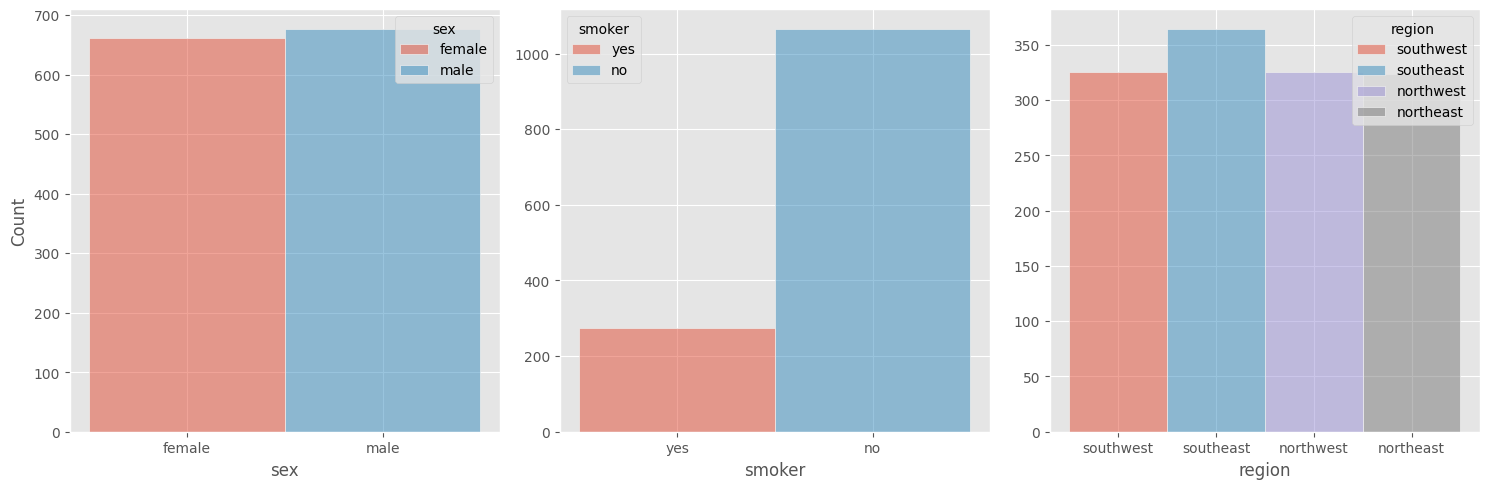

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(ax=axes[0], data=data, x="sex", hue="sex")
sns.histplot(ax=axes[1], data=data, x="smoker", hue="smoker").set(ylabel=None)
sns.histplot(ax=axes[2], data=data, x="region", hue="region").set(ylabel=None)

plt.tight_layout()
plt.show()

- **sex**: There is no significant difference between female and male.
- **smoker**: There is around 300 smokers in the group.
- **region**: The southeast region has slightly more people than the others.


## 3.2. Numeric Variables

In [58]:
def get_column_stat(column):
    stats = data[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr

    print(f"The stats for the '{column}' column are:\n")
    print(f"- Upper limit: {round(upper_limit,2)}")
    print(f"- Lower limit: {round(lower_limit,2)}")
    print(f"- Interquartile range: {round(iqr,2)}\n")
    print(f"{stats}\n")

### age

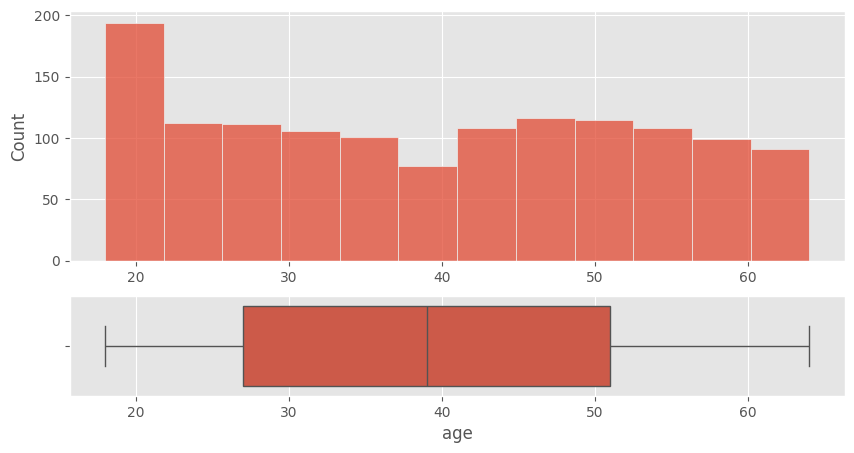

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="age", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="age", ax=axes[1])

plt.show()

We can see that the age distribution is nearly symmetric.

### bmi

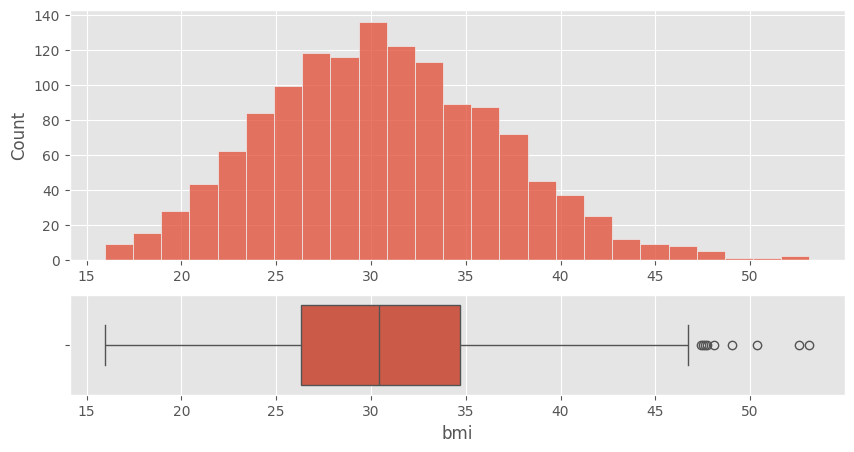

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="bmi", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="bmi", ax=axes[1])

plt.show()

In [61]:
get_column_stat("bmi")

The stats for the 'bmi' column are:

- Upper limit: 47.29
- Lower limit: 13.7
- Interquartile range: 8.4

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64



In [62]:
data[data["bmi"] > 47]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


The distribution is almost symmetric with 9 outliers beyond the 47 mark.

[Back to top](#table_of_contents)

### children

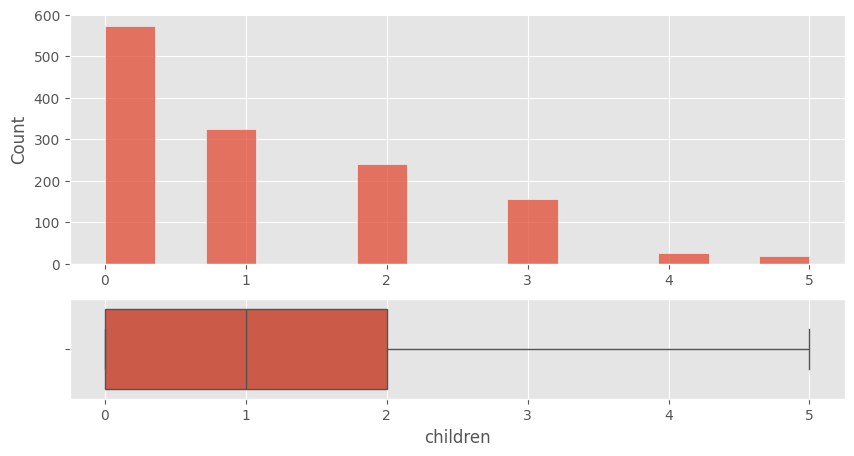

In [63]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="children", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="children", ax=axes[1])

plt.show()

The plot is left skewed and show us that most people do not have children.

### charges

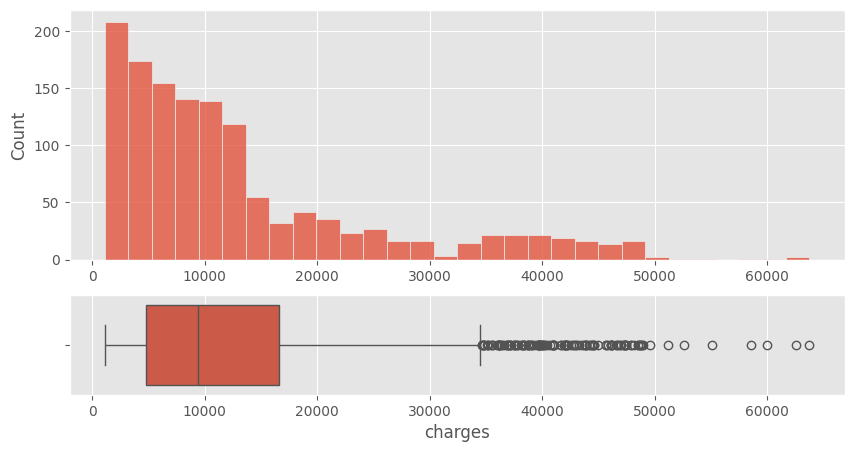

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={"height_ratios": [5, 2]})

sns.histplot(data=data, x="charges", ax=axes[0]).set(xlabel=None)
sns.boxplot(data=data, x="charges", ax=axes[1])

plt.show()

In [65]:
get_column_stat("charges")

The stats for the 'charges' column are:

- Upper limit: 34489.35
- Lower limit: -13109.15
- Interquartile range: 11899.63

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64



In [66]:
data[data["charges"] > 35000]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


There is 133 outliers in the charges column which represent about 10% of the records.

[Back to top](#table_of_contents)

# 4. Multivariate Analysis <a id='4'></a>

## 4.1. Categoric-categoric Analysis

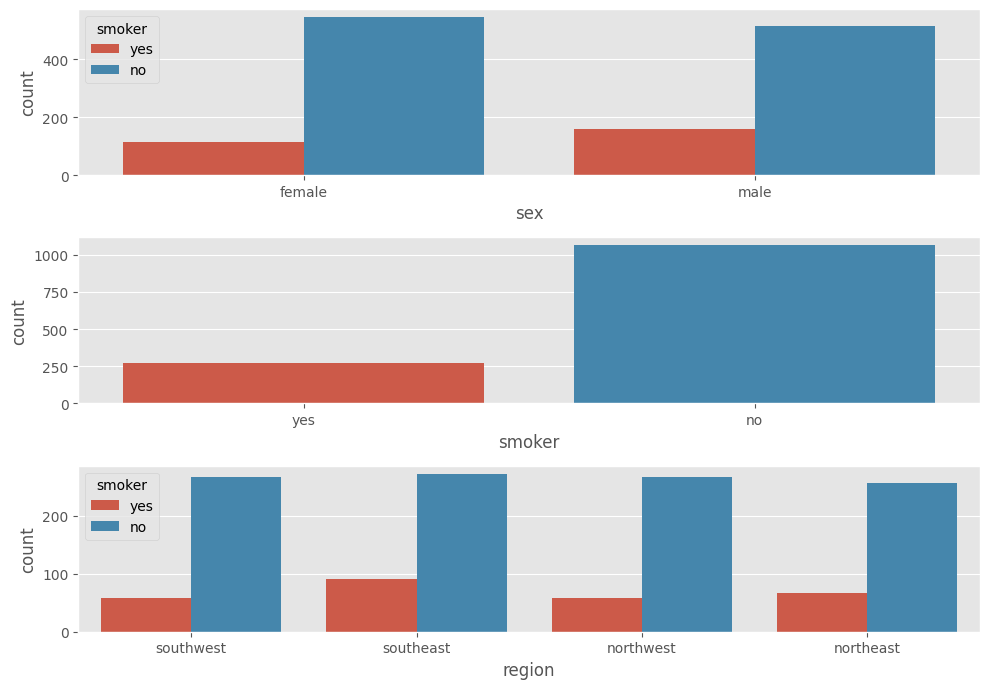

In [67]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))

sns.countplot(ax=axes[0], data=data, x="sex", hue="smoker")
sns.countplot(ax=axes[1], data=data, x="smoker", hue="smoker")
sns.countplot(ax=axes[2], data=data, x="region", hue="smoker")

plt.tight_layout()
plt.show()

- Men smoke more than women.
- Around 250 people are smokers.
- The southeast region has more smokers compared to the other 3.

## 4.2. Numeric-numeric Analysis

In [68]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


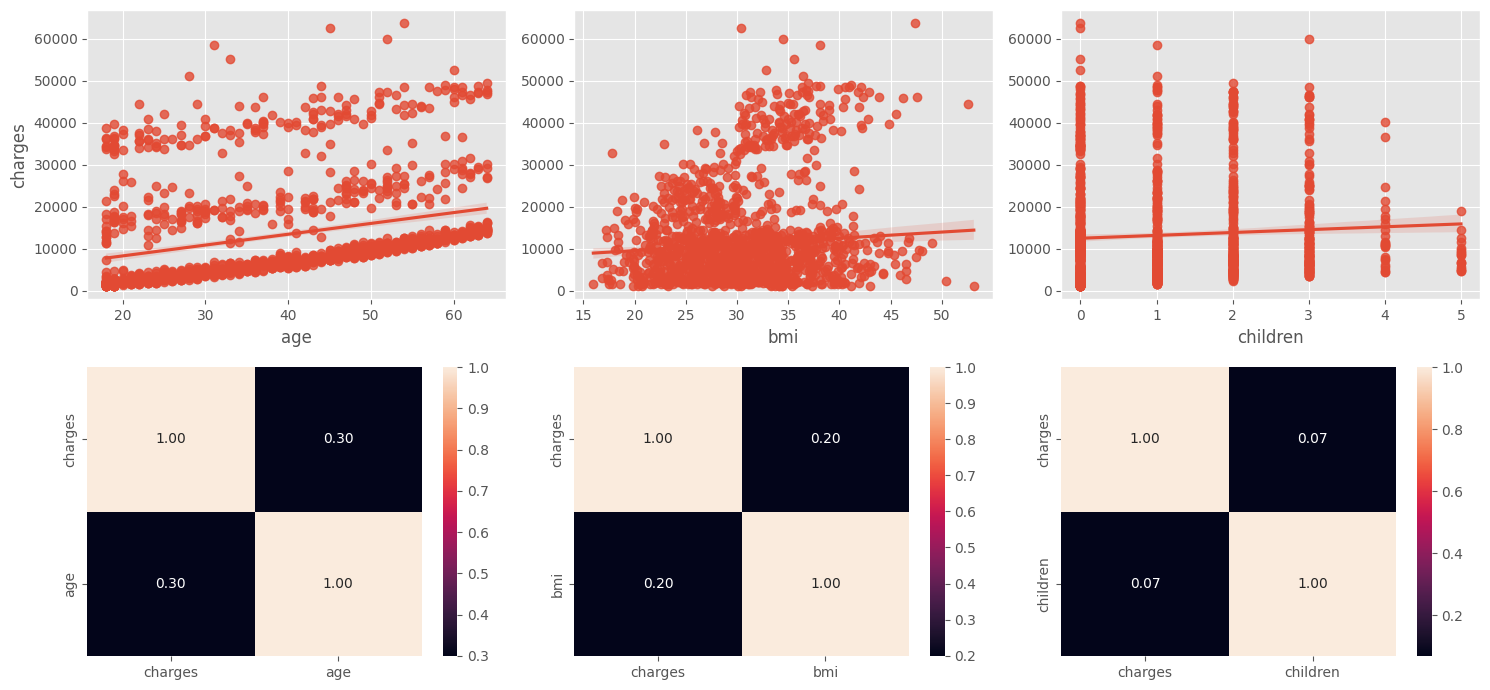

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

sns.regplot(ax=axes[0, 0], data=data, x="age", y="charges")
sns.heatmap(data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axes[1, 0])

sns.regplot(ax=axes[0, 1], data=data, x="bmi", y="charges", robust=True).set(ylabel=None)
sns.heatmap(data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axes[1, 1])

sns.regplot(ax=axes[0, 2], data=data, x="children", y="charges").set(ylabel=None)
sns.heatmap(data[["charges", "children"]].corr(), annot=True, fmt=".2f", ax=axes[1, 2])

plt.tight_layout()

plt.show()

- The higher the age, higher the charges.
- Usually the higher the BMI, higher the charges.
- The charges tend to increase if you have more children.

## 4.3. Correlation Analysis

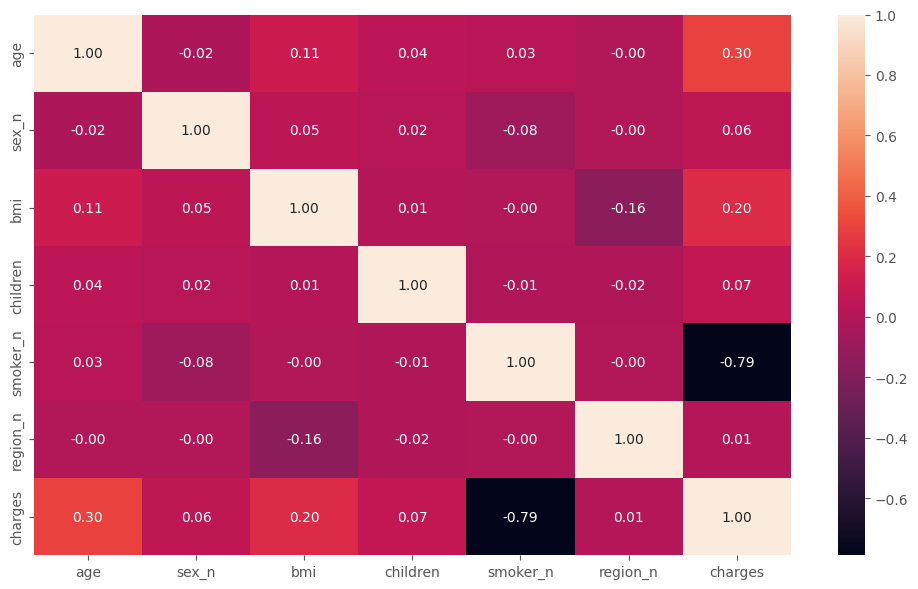

In [70]:
data["sex_n"] = pd.factorize(data["sex"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]
data["region_n"] = pd.factorize(data["region"])[0]

fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(data[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

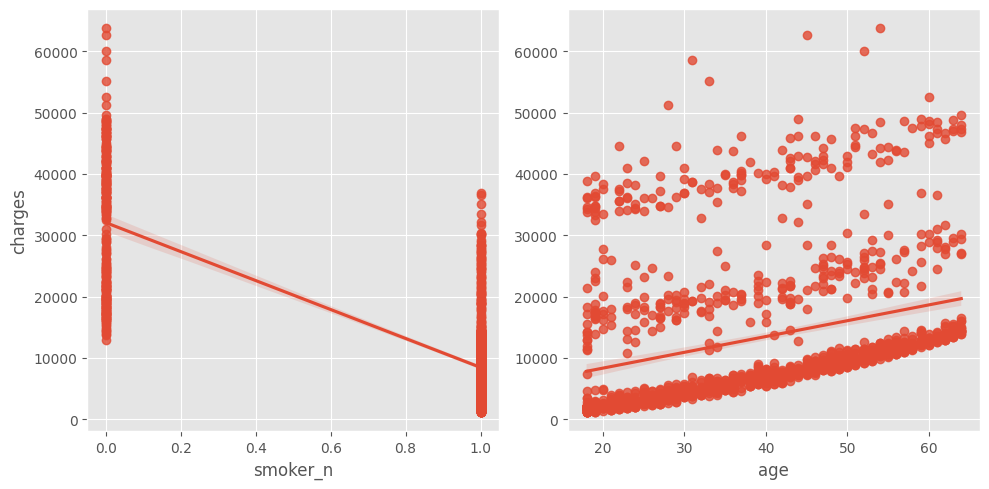

In [71]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)

sns.regplot(ax=axes[0], data=data, x="smoker_n", y="charges")
sns.regplot(ax=axes[1], data=data, x="age", y="charges").set(ylabel=None)

plt.tight_layout()
plt.show()

[Back to top](#table_of_contents)

# 5. Feature Engineering <a id='5'></a>

In [72]:
data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


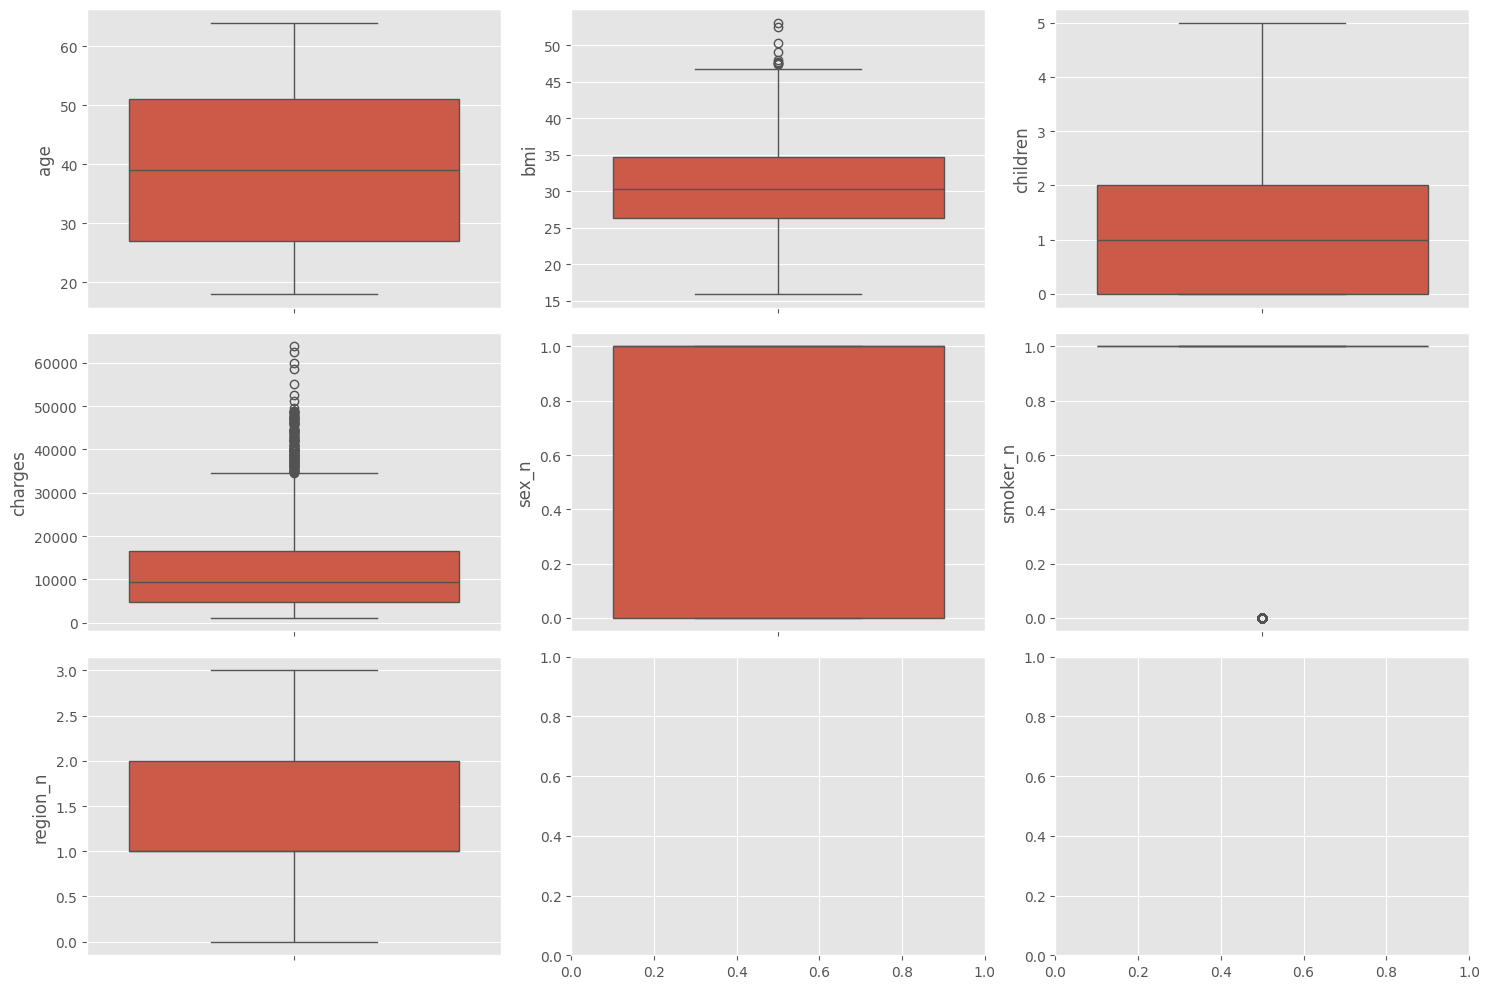

In [73]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=data, y="age")
sns.boxplot(ax=axes[0, 1], data=data, y="bmi")
sns.boxplot(ax=axes[0, 2], data=data, y="children")
sns.boxplot(ax=axes[1, 0], data=data, y="charges")
sns.boxplot(ax=axes[1, 1], data=data, y="sex_n")
sns.boxplot(ax=axes[1, 2], data=data, y="smoker_n")
sns.boxplot(ax=axes[2, 0], data=data, y="region_n")

plt.tight_layout()
plt.show()

## 5.1. Outlier Analysis

In [74]:
# Limits analysis

def get_column_stat(column):
    stats = data[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr

    print(f"The stats for the '{column}' column are:\n")
    print(f"- Upper limit: {round(upper_limit,2)}")
    print(f"- Lower limit: {round(lower_limit,2)}")
    print(f"- Interquartile range: {round(iqr,2)}\n")
    print(f"{stats}\n")

### bmi

In [75]:
get_column_stat("bmi")

The stats for the 'bmi' column are:

- Upper limit: 47.29
- Lower limit: 13.7
- Interquartile range: 8.4

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64



In [76]:
data[data['bmi'] > 47]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
116,58,male,49.06,0,no,southeast,11381.32540,1,1,1
286,46,female,48.07,2,no,northeast,9432.92530,0,1,3
401,47,male,47.52,1,no,southeast,8083.91980,1,1,1
543,54,female,47.41,0,yes,southeast,63770.42801,0,0,1
847,23,male,50.38,1,no,southeast,2438.05520,1,1,1
860,37,female,47.60,2,yes,southwest,46113.51100,0,0,0
1047,22,male,52.58,1,yes,southeast,44501.39820,1,0,1
1088,52,male,47.74,1,no,southeast,9748.91060,1,1,1
1317,18,male,53.13,0,no,southeast,1163.46270,1,1,1


There are 9 records with a BMI higher than the upper limit.\
Since the BMI can have a big difference from person to person, and the number is not that significant, the best approach is to leave the variable as it is.

### charges

In [77]:
get_column_stat("charges")

The stats for the 'charges' column are:

- Upper limit: 34489.35
- Lower limit: -13109.15
- Interquartile range: 11899.63

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64



In [78]:
data[data['charges'] > 34500]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
14,27,male,42.130,0,yes,southeast,39611.75770,1,0,1
19,30,male,35.300,0,yes,southwest,36837.46700,1,0,0
23,34,female,31.920,1,yes,northeast,37701.87680,0,0,3
29,31,male,36.300,2,yes,southwest,38711.00000,1,0,0
30,22,male,35.600,0,yes,southwest,35585.57600,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,1,0,1
1301,62,male,30.875,3,yes,northwest,46718.16325,1,0,2
1303,43,male,27.800,0,yes,southwest,37829.72420,1,0,0
1313,19,female,34.700,2,yes,southwest,36397.57600,0,0,0


In [79]:
data[(data["charges"] > 34500) & (data["smoker_n"] == 0)]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
14,27,male,42.130,0,yes,southeast,39611.75770,1,0,1
19,30,male,35.300,0,yes,southwest,36837.46700,1,0,0
23,34,female,31.920,1,yes,northeast,37701.87680,0,0,3
29,31,male,36.300,2,yes,southwest,38711.00000,1,0,0
30,22,male,35.600,0,yes,southwest,35585.57600,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,1,0,1
1301,62,male,30.875,3,yes,northwest,46718.16325,1,0,2
1303,43,male,27.800,0,yes,southwest,37829.72420,1,0,0
1313,19,female,34.700,2,yes,southwest,36397.57600,0,0,0


With a total of 139 rows above the upper limit, the 'charges' variable is by far the most discrepant variable of all.\
But with a further analysis we can see that most of those values (136) are from smokers which may explain why they are charged more.

## 5.2. Missing Values Analysis

In [80]:
data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

## 5.3. Feature Scaling

In [100]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]

X = data.drop("charges", axis=1)[num_variables]
y = data["charges"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,age,bmi,children,sex_n,smoker_n,region_n
560,46,19.95,2,0,1,2
1285,47,24.32,0,0,1,3
1142,52,24.86,0,0,1,1
969,39,34.32,5,0,1,1
486,54,21.47,3,0,1,2


In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=num_variables)

X_train_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
560,0.608696,0.107345,0.4,0.0,1.0,0.666667
1285,0.630435,0.224913,0.0,0.0,1.0,1.000000
1142,0.739130,0.239440,0.0,0.0,1.0,0.333333
969,0.456522,0.493947,1.0,0.0,1.0,0.333333
486,0.782609,0.148238,0.6,0.0,1.0,0.666667


[Back to top](#table_of_contents)

# 6. Feature Selection <a id='6'></a>

In [102]:
from sklearn.feature_selection import chi2, SelectKBest

selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()

,age,bmi,children,sex_n,region_n
0,46.0,19.95,2.0,0.0,2.0
1,47.0,24.32,0.0,0.0,3.0
2,52.0,24.86,0.0,0.0,1.0
3,39.0,34.32,5.0,0.0,1.0
4,54.0,21.47,3.0,0.0,2.0


In [103]:
X_test_sel.head()

,age,bmi,children,sex_n,region_n
0,45.0,25.175,2.0,0.0,3.0
1,36.0,30.020,0.0,0.0,2.0
2,64.0,26.885,0.0,0.0,2.0
3,46.0,25.745,3.0,1.0,2.0
4,19.0,31.920,0.0,1.0,2.0


In [105]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)

[Back to top](#table_of_contents)

# 7. Linear Regression Model <a id='7'></a>

In [107]:
from sklearn.linear_model import LinearRegression

X_train = X_train_sel.drop(["charges"], axis=1)
y_train = X_train_sel["charges"]

X_test = X_test_sel.drop(["charges"], axis=1)
y_test = X_test_sel["charges"]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): -7574.380893591511
Coefficients (b): [ 221.30042427  340.76584517  550.45855818 1319.80586232  342.42464616]


In [110]:
y_pred = model.predict(X_test)
y_pred

array([13091.10940572, 11307.07434458, 16435.18529963, 15034.48613608,
        9512.22810007, 16438.95271   ,  4987.51946393, 21510.23077573,
        5541.14638754, 16701.94282293, 10350.49999362, 15028.53597638,
        9819.47597326, 20350.47834896, 21310.01345566, 18859.30868303,
       19256.56793019, 16201.87516018, 13056.80378435, 11787.87638989,
       10174.53206604, 15471.22688139,  8309.41472309, 11885.6868459 ,
       15409.20085313, 16539.34377582, 17664.52572828, 11096.23722183,
       14019.30158364,  8341.93982523, 13463.90957355, 16569.46560486,
        9297.85768339,  8199.13541262, 10272.66991312, 18295.40246651,
        6619.60488682, 12680.89467893, 13391.22886309, 14600.0811969 ,
        9128.52313037, 10532.35139933, 17568.31868099, 16162.89771122,
       14674.0596971 , 16723.66930122, 10318.6497979 ,  7890.11542542,
       17512.49098396, 15131.08067981, 19079.77066147,  8630.00868264,
       16627.46523479,  7658.61424921, 18213.24142341, 17880.62852566,
      

ValueError: array length 268 does not match index length 1338

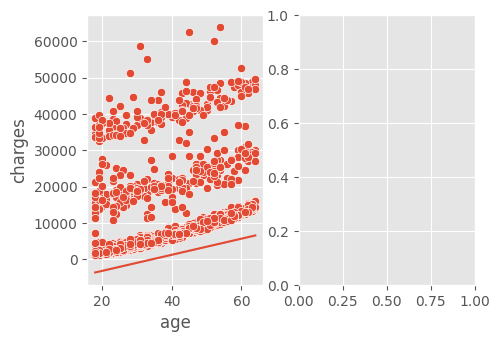

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(5, 3.5))
total_data = pd.concat([X_train_sel, X_test_sel])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: -7574.380893591511 + 221.30042427 * x

sns.scatterplot(ax=axes[0], data=data, x="age", y="charges")
sns.lineplot(ax=axes[0], x=data["age"], y=regression_equation(data["age"]))

sns.scatterplot(ax=axes[1], x=data["age"], y=y_pred)
sns.lineplot(ax=axes[1], x=data["age"], y=regression_equation(data["age"])).set(ylabel=None)

plt.tight_layout()

plt.show()